**Dataset Description**

ugpa - undergraduate gpa. 

decile1, decile1b, decile3 - These features represent the law school rankings by decile of each candidate in years 1 and 3

lsat - LSAT score of each candidate

grad - indicates that the student who took the bar exam graduated from law school or not.

fulltime - Was the student a full-time student.

fam_inc - This feature is family income by quintile.

tier - What tier law school did the student attend by quintile.

race1 - Categorizes students by race.

sex - student gender.

pass_bar - whether the student passed the bar exam or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_train = pd.read_csv("/content/drive/MyDrive/DPhi Contests/train_dataset.csv")
original_test = pd.read_csv("/content/drive/MyDrive/DPhi Contests/test_dataset.csv")

In [3]:
original_train.head()

,decile3,decile1,sex,lsat,ugpa,grad,fulltime,fam_inc,parttime,male,race1,tier,decile1b,pass_bar
0,9.0,8.0,1.0,40.0,3.7,0,1.0,4.0,0.0,0.0,4,4.0,8.0,1
1,2.0,2.0,1.0,39.0,3.5,0,1.0,4.0,0.0,0.0,4,4.0,2.0,1
2,3.0,3.0,2.0,34.0,2.8,0,1.0,3.0,0.0,1.0,4,2.0,3.0,1
3,8.0,7.0,1.0,39.0,2.8,0,2.0,3.0,1.0,0.0,4,3.0,7.0,1
4,6.0,1.0,1.0,42.0,3.7,0,2.0,3.0,1.0,0.0,4,3.0,1.0,1


In [4]:
original_test.head(2)

,decile3,decile1,sex,lsat,ugpa,grad,fulltime,fam_inc,parttime,male,race1,tier,decile1b
0,5.0,4.0,1.0,29.0,3.1,0,1.0,3.0,0.0,0.0,4,3.0,3.0
1,9.0,10.0,1.0,42.0,3.8,0,1.0,4.0,0.0,0.0,4,6.0,10.0


In [5]:
df = original_train.copy(deep=True)

In [6]:
df.head()

,decile3,decile1,sex,lsat,ugpa,grad,fulltime,fam_inc,parttime,male,race1,tier,decile1b,pass_bar
0,9.0,8.0,1.0,40.0,3.7,0,1.0,4.0,0.0,0.0,4,4.0,8.0,1
1,2.0,2.0,1.0,39.0,3.5,0,1.0,4.0,0.0,0.0,4,4.0,2.0,1
2,3.0,3.0,2.0,34.0,2.8,0,1.0,3.0,0.0,1.0,4,2.0,3.0,1
3,8.0,7.0,1.0,39.0,2.8,0,2.0,3.0,1.0,0.0,4,3.0,7.0,1
4,6.0,1.0,1.0,42.0,3.7,0,2.0,3.0,1.0,0.0,4,3.0,1.0,1


In [7]:
df.describe()

,decile3,decile1,sex,lsat,ugpa,grad,fulltime,fam_inc,parttime,male,race1,tier,decile1b,pass_bar
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.496000,5.700400,1.557800,36.639700,3.207820,0.0,1.07160,3.463000,0.07160,0.557800,3.549600,3.693200,5.506800,0.950400
std,2.840915,2.774848,0.496698,5.404105,0.394887,0.0,0.25785,0.853215,0.25785,0.496698,1.086543,1.117552,2.855028,0.217139
min,1.000000,1.000000,1.000000,16.000000,1.700000,0.0,1.00000,1.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3.000000,3.000000,1.000000,33.000000,2.900000,0.0,1.00000,3.000000,0.00000,0.000000,4.000000,3.000000,3.000000,1.000000
50%,6.000000,6.000000,2.000000,37.000000,3.200000,0.0,1.00000,4.000000,0.00000,1.000000,4.000000,4.000000,5.000000,1.000000
75%,8.000000,8.000000,2.000000,40.000000,3.500000,0.0,1.00000,4.000000,0.00000,1.000000,4.000000,4.000000,8.000000,1.000000
max,10.000000,10.000000,2.000000,48.000000,3.900000,0.0,2.00000,5.000000,1.00000,1.000000,4.000000,6.000000,10.000000,1.000000


In [8]:
df.dtypes

decile3     float64
decile1     float64
sex         float64
lsat        float64
ugpa        float64
grad          int64
fulltime    float64
fam_inc     float64
parttime    float64
male        float64
race1         int64
tier        float64
decile1b    float64
pass_bar      int64
dtype: object

In [9]:
print(df.isnull().sum())

decile3     0
decile1     0
sex         0
lsat        0
ugpa        0
grad        0
fulltime    0
fam_inc     0
parttime    0
male        0
race1       0
tier        0
decile1b    0
pass_bar    0
dtype: int64


In [10]:
import matplotlib.pyplot as plt

In [11]:
df.columns

Index(['decile3', 'decile1', 'sex', 'lsat', 'ugpa', 'grad', 'fulltime',
       'fam_inc', 'parttime', 'male', 'race1', 'tier', 'decile1b', 'pass_bar'],
      dtype='object')

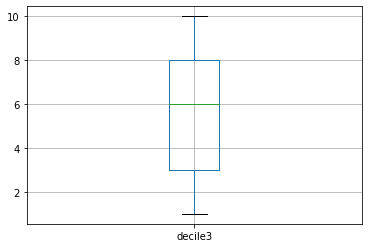

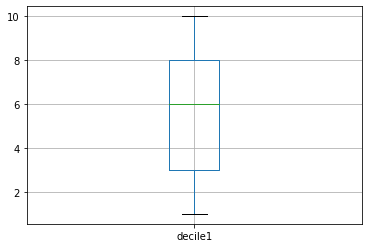

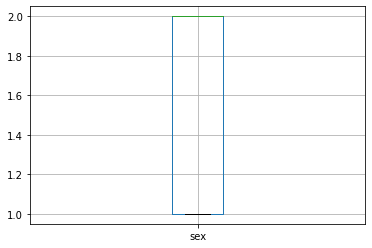

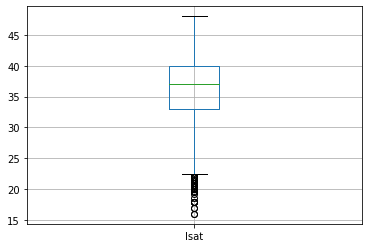

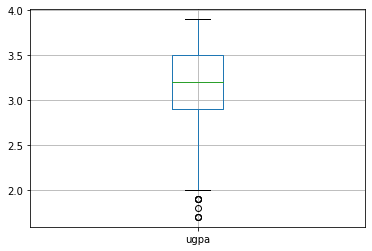

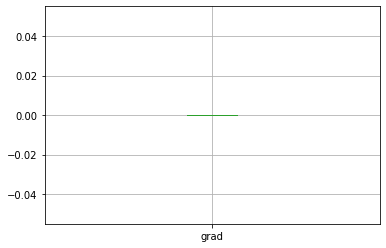

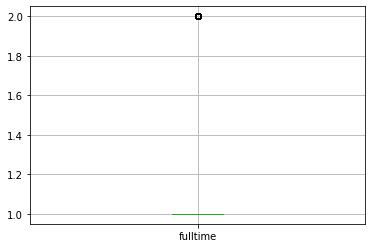

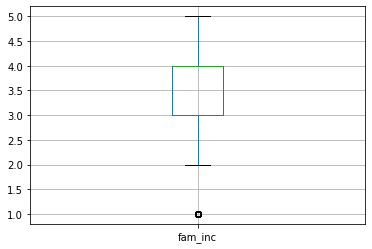

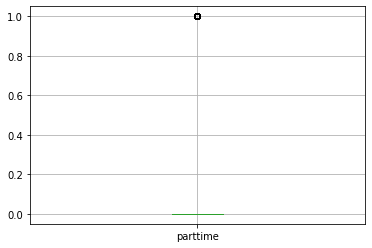

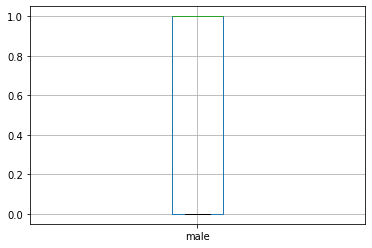

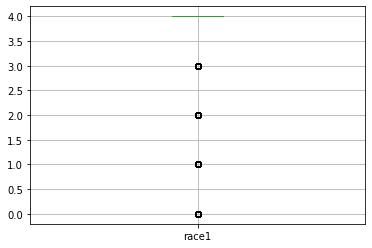

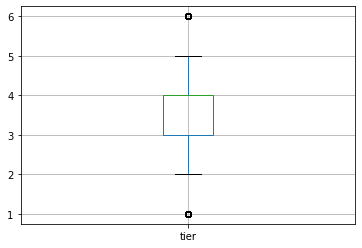

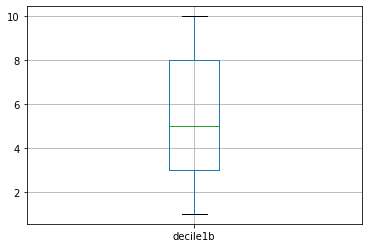

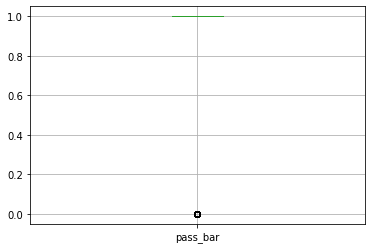

In [12]:
for column in df:
    plt.figure()
    df.boxplot([column])
    print()

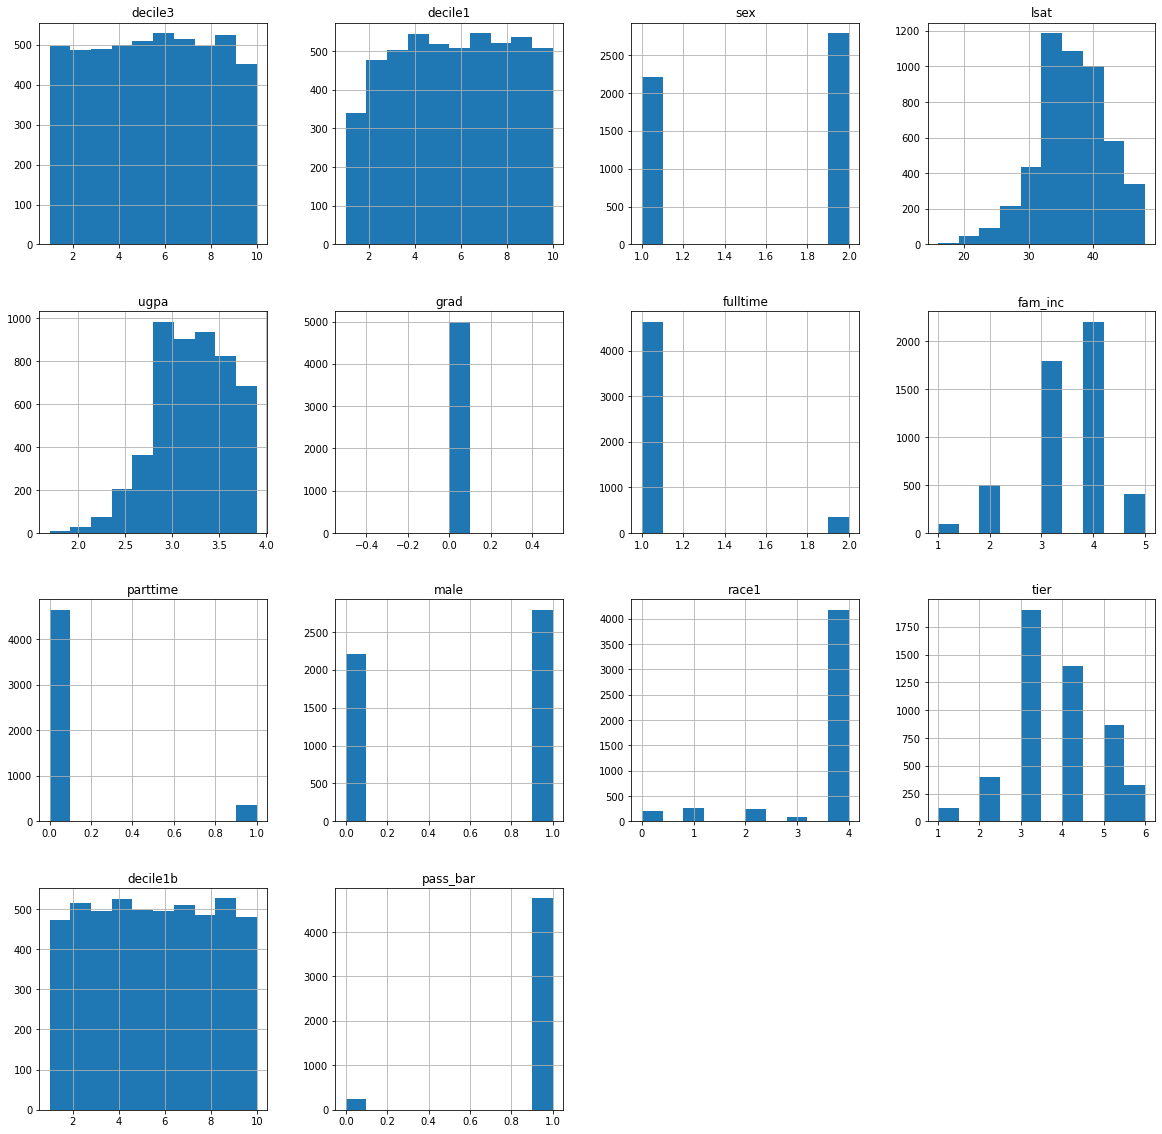

In [13]:
hplot = df.hist(figsize = (20,20))

In [14]:
np.arange(-20, 20, 0.01)

array([-20.  , -19.99, -19.98, ...,  19.97,  19.98,  19.99])

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc083974090>


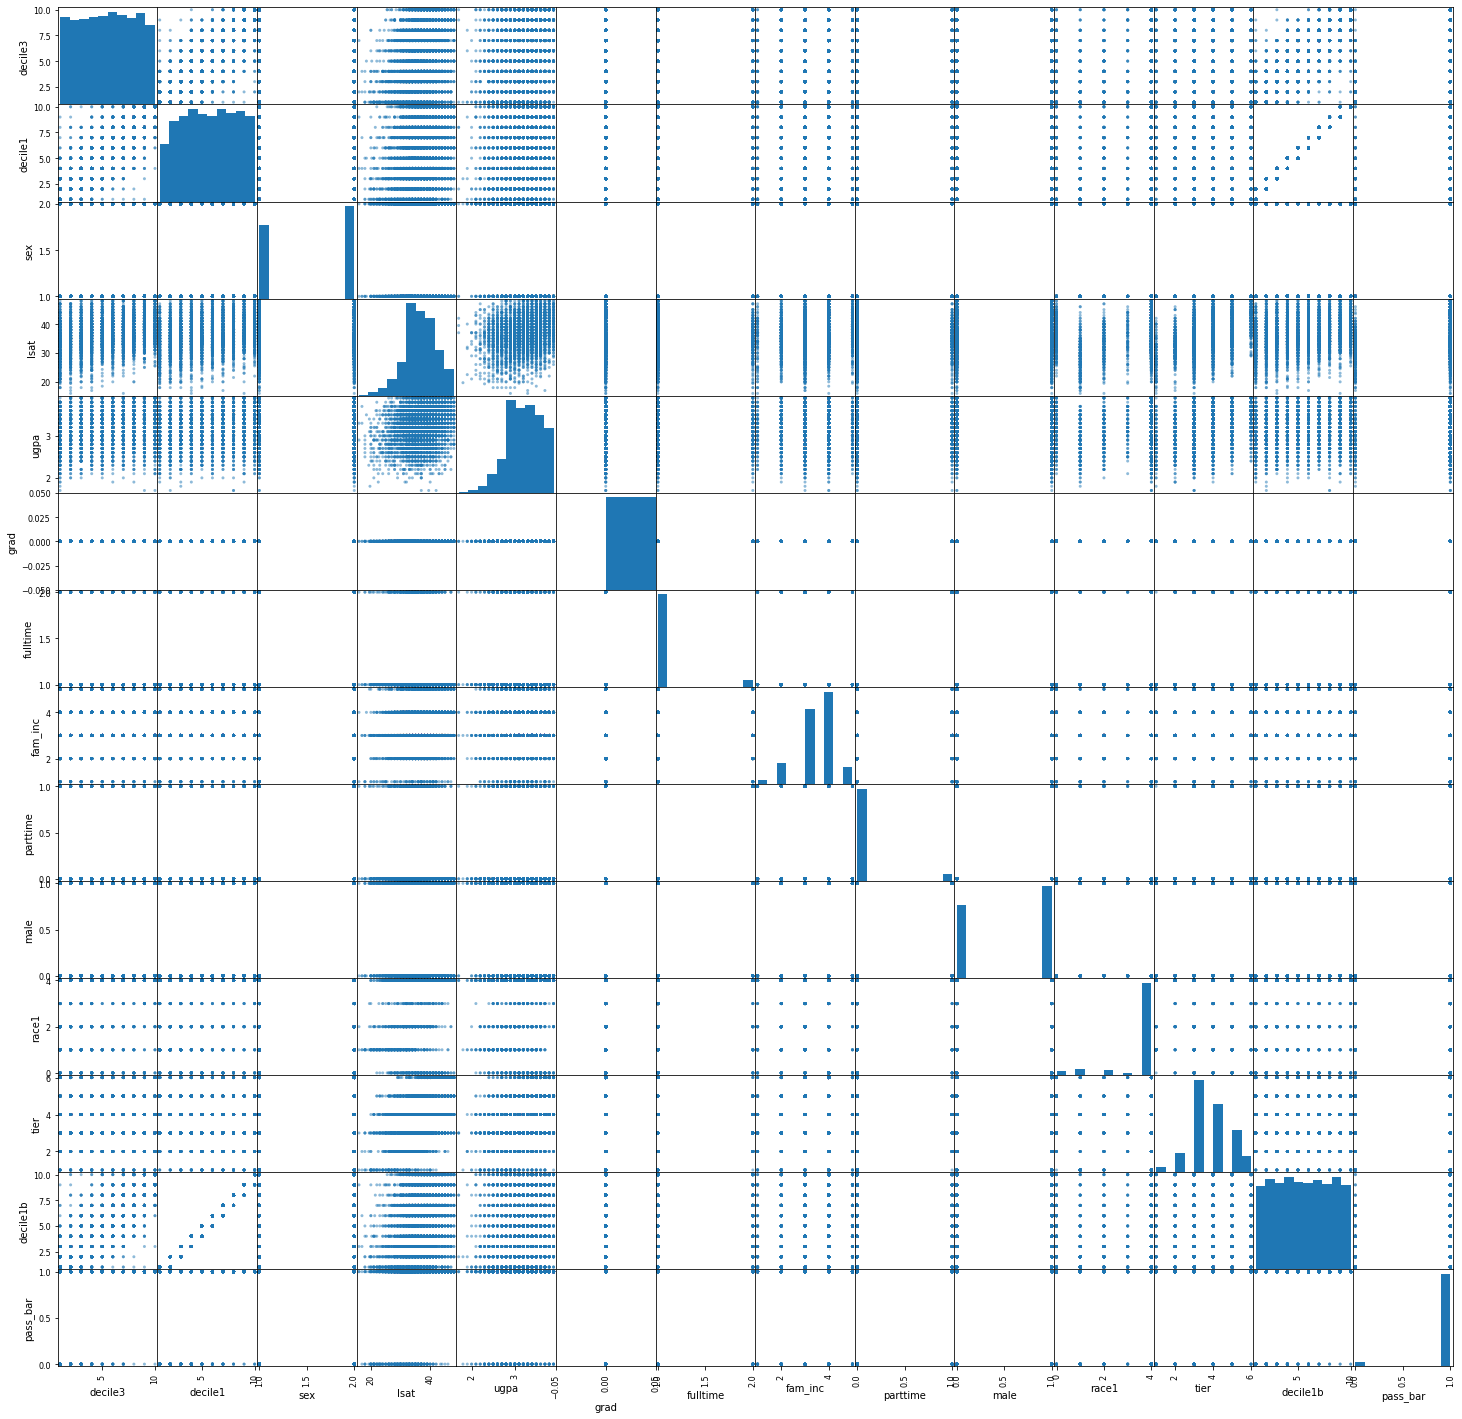

In [15]:
from pandas.plotting import scatter_matrix

p = scatter_matrix(df, figsize = (25, 25))
print(p)

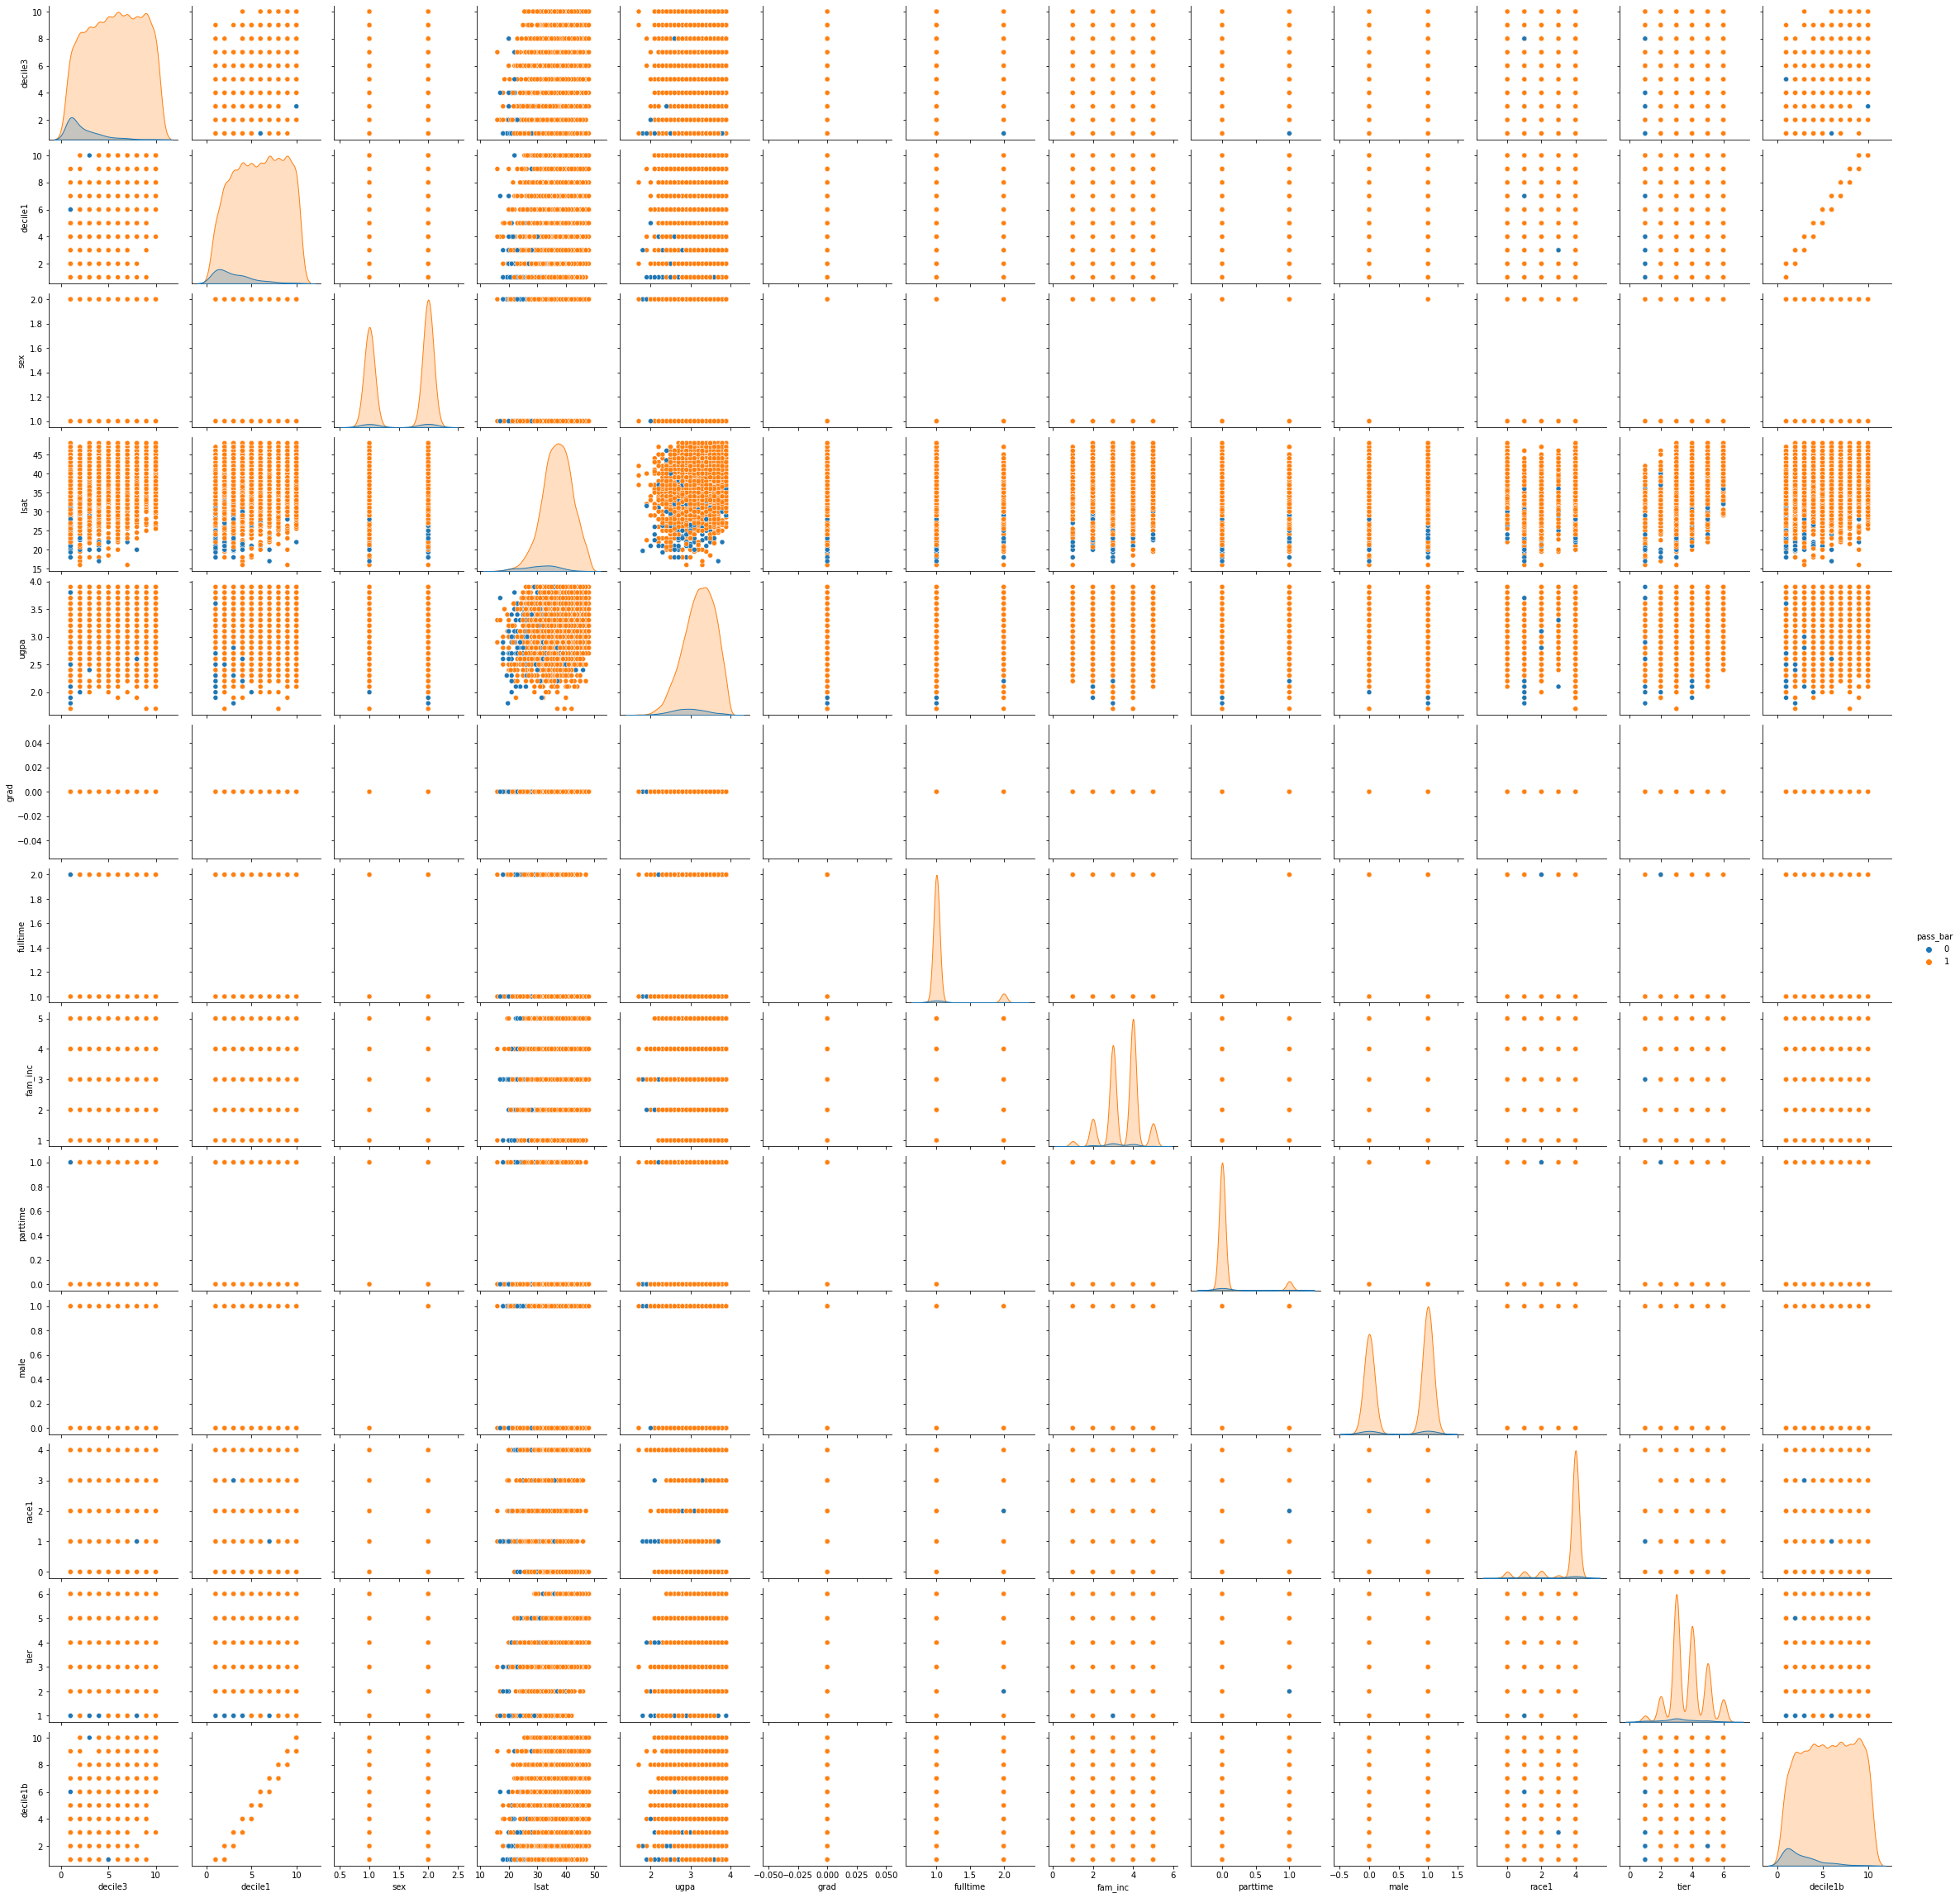

In [16]:
p  = sns.pairplot(df, hue = 'pass_bar')
print(p)

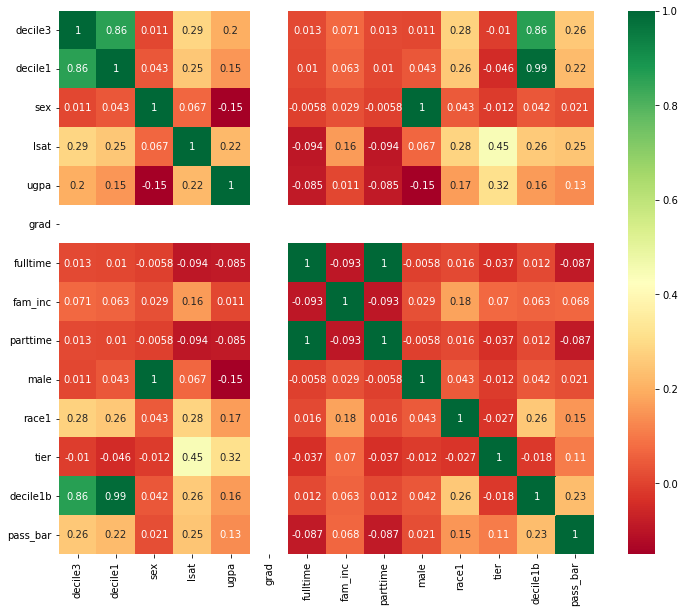

In [17]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')

In [18]:
df=df.drop('grad', axis=1)

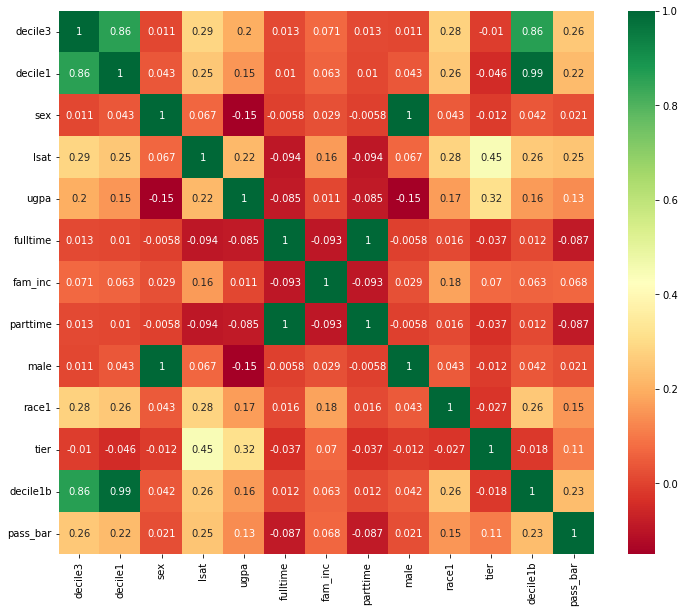

In [19]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')

In [20]:
len(['decile3', 'decile1', 'sex', 'lsat', 'ugpa', 'fulltime',
       'fam_inc', 'parttime', 'male', 'race1', 'tier', 'decile1b'])

12

In [21]:
from sklearn.preprocessing import StandardScaler

scale_X = StandardScaler()
x = scale_X.fit_transform(df.drop(["pass_bar"], axis = 1),)
X = pd.DataFrame(x, columns = ['decile3', 'decile1', 'sex', 'lsat', 'ugpa', 'fulltime', 'fam_inc', 'parttime', 'male', 'race1', 'tier', 'decile1b'])

In [22]:
X.head()

,decile3,decile1,sex,lsat,ugpa,fulltime,fam_inc,parttime,male,race1,tier,decile1b
0,1.233529,0.828813,-1.123130,0.621867,1.246505,-0.277708,0.629447,-0.277708,-1.123130,0.414567,0.274556,0.873354
1,-1.230713,-1.333684,-1.123130,0.436804,0.739981,-0.277708,0.629447,-0.277708,-1.123130,0.414567,0.274556,-1.228412
2,-0.878678,-0.973268,0.890369,-0.488511,-1.032853,-0.277708,-0.542707,-0.277708,0.890369,0.414567,-1.515248,-0.878118
3,0.881494,0.468397,-1.123130,0.436804,-1.032853,3.600900,-0.542707,3.600900,-1.123130,0.414567,-0.620346,0.523059
4,0.177425,-1.694100,-1.123130,0.991993,1.246505,3.600900,-0.542707,3.600900,-1.123130,0.414567,-0.620346,-1.578706


In [23]:
y = df.pass_bar

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42, stratify = y)

In [24]:
# Data modelling

from sklearn.neighbors import KNeighborsClassifier

testing_score = []
training_score = []

for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    training_score.append(knn.score(x_train, y_train))
    testing_score.append(knn.score(x_test, y_test))

In [25]:
max_training_score = max(training_score)
train_scores_ind = [i for i, v in enumerate(training_score) if v == max_training_score]
print("Max training score {} % and k = {}".format(max_training_score * 100, list(map(lambda x: x+1, train_scores_ind))))

Max training score 100.0 % and k = [1]


In [26]:
max_testing_score = max(testing_score)
test_scores_ind = [i for i, v in enumerate(testing_score) if v == max_testing_score]
print("Max testing score {} % and k = {}".format(max_testing_score * 100, list(map(lambda x: x+1, test_scores_ind))))

Max testing score 95.02099580083984 % and k = [14]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


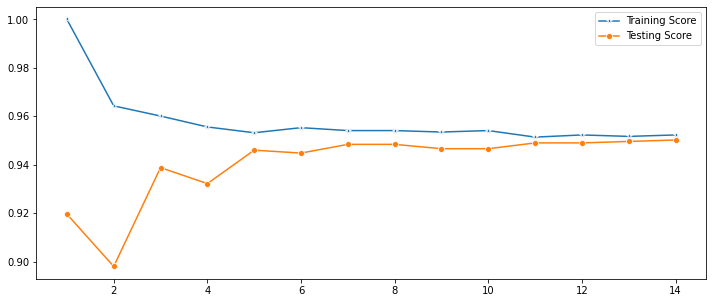

In [27]:
plt.figure(figsize=(12, 5))
pplot = sns.lineplot(range(1,15), training_score, marker = '*', label='Training Score')
pplot = sns.lineplot(range(1,15), testing_score, marker = 'o', label='Testing Score')

In [28]:
# Build the model using selected hyperparameter -i.e.- k = 14

knn = KNeighborsClassifier(14)

knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9502099580083984

In [30]:
# Scaling test data

original_test.describe()

,decile3,decile1,sex,lsat,ugpa,grad,fulltime,fam_inc,parttime,male,race1,tier,decile1b
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,5.544200,5.707200,1.557600,36.756540,3.210200,0.0,1.081000,3.488800,0.081000,0.557600,3.572000,3.750800,5.53700
std,2.851679,2.782268,0.496721,5.419209,0.403128,0.0,0.272862,0.839533,0.272862,0.496721,1.062564,1.124345,2.84525
min,1.000000,1.000000,1.000000,12.000000,1.800000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,3.000000,3.000000,1.000000,33.000000,3.000000,0.0,1.000000,3.000000,0.000000,0.000000,4.000000,3.000000,3.00000
50%,6.000000,6.000000,2.000000,37.000000,3.200000,0.0,1.000000,4.000000,0.000000,1.000000,4.000000,4.000000,6.00000
75%,8.000000,8.000000,2.000000,40.500000,3.500000,0.0,1.000000,4.000000,0.000000,1.000000,4.000000,5.000000,8.00000
max,10.000000,10.000000,2.000000,48.000000,3.900000,0.0,2.000000,5.000000,1.000000,1.000000,4.000000,6.000000,10.00000


In [32]:
test_df = original_test.drop('grad', axis=1)

In [33]:
test_df.columns

Index(['decile3', 'decile1', 'sex', 'lsat', 'ugpa', 'fulltime', 'fam_inc',
       'parttime', 'male', 'race1', 'tier', 'decile1b'],
      dtype='object')

In [34]:
test = scale_X.fit_transform(test_df,)
scaled_test_df = pd.DataFrame(test, columns = ['decile3', 'decile1', 'sex', 'lsat', 'ugpa', 'fulltime', 'fam_inc', 'parttime', 'male', 'race1', 'tier', 'decile1b'])

In [35]:
scaled_test_df.head(2)

,decile3,decile1,sex,lsat,ugpa,fulltime,fam_inc,parttime,male,race1,tier,decile1b
0,-0.190854,-0.613661,-1.122674,-1.431448,-0.273389,-0.296883,-0.582287,-0.296883,-1.122674,0.40284,-0.667833,-0.891751
1,1.211969,1.543068,-1.122674,0.967666,1.463204,-0.296883,0.608971,-0.296883,-1.122674,0.40284,2.000653,1.568736


In [40]:
# Prediction using trained model

y_pred_model = knn.predict(scaled_test_df)

In [43]:
for i in y_pred_model:
  print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [48]:
len(y_test)

1667

[[   0   83]
 [   6 1578]]



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


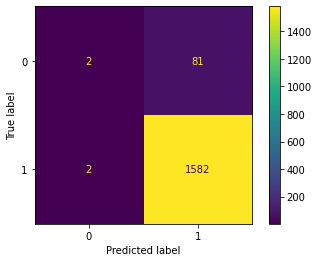

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test, y_pred_model[:1667]))
print()
print(plot_confusion_matrix(knn, x_test, y_test))

In [47]:
from sklearn.metrics import accuracy_score

acc_knn = round(accuracy_score(y_test, y_pred_model[:1667]) * 100, 2)
acc_knn

94.66

In [52]:
# Saving predictions

# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(y_pred_model) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_df.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["pass_bar"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', index = False)         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---